# Notebook for MRR processing

By: Claudio Duran-Alarcon - PhD student, IGE

PhD Directors: Brice Boudevillain, Alexis Berne

Project: ANR-APRES3, Director: Christophe Genthon

## Importing libraries

In [16]:
import sys, os
sys.path.append("lib/") # adding lib path
from MRR_functions import check_RawFiles as crf  # Check Raw files for corrupted characters
from MRR_functions import raw2snow # Process raw data into Doppler moments using MK2012
from MRR_functions import densplot # 2D density plots
from MRR_functions import QuickL #MRR QuickLooks
import time, warnings, pylab
from netCDF4 import Dataset # Read and write ncCDF files
from netCDF4 import MFDataset # Read Multiple netCDF files

#warnings.filterwarnings("ignore") #Ignore IMProToo warmings
Short_name_station = "DDU" #Define folter station name
name_station = '_'.join(Short_name_station.split(' '))
path = "Data/"+name_station+"/"

#Creating output folders
if os.path.exists(os.path.dirname('Data/DDU/MK_processed/')) == False: 
    os.mkdir(os.path.dirname('Data/DDU/MK_processed/')) 
if os.path.exists(os.path.dirname('Data/DDU/Plots/')) == False: 
    os.mkdir(os.path.dirname('Data/DDU/Plots/')) 
if os.path.exists(os.path.dirname('Data/DDU/temp/')) == False: 
    os.mkdir(os.path.dirname('Data/DDU/temp/')) 
if os.path.exists(os.path.dirname('Data/DDU/Plots/Doppler_Moments/')) == False: 
    os.mkdir(os.path.dirname('Data/DDU/Plots/Doppler_Moments/')) 
if os.path.exists(os.path.dirname('Data/DDU/Plots/Vertical_profiles/')) == False: 
    os.mkdir(os.path.dirname('Data/DDU/Plots/Vertical_profiles/')) 
    
#Decription of the output files
Descr = "MRR data at " + name_station + ", first MRR processed with MK12 method v.0.103."

#Temporal Resolution
TRES = 60 #Seconds

## Process data

In [8]:
#Define Dates
years =  [2017] # e.g.  [2014];  [2014,2015];  range(2014,2016)   
months = [2] # e.g.  [12];  [4,5,6];  range(1,13)   
days  = [8,9,10]#range(8,9)# e.g.  [1];  [1,2,4];  range(1,5)   

### Process all the files within the defined period of dates

In [15]:
for year in years:
    for month in months:
        for day in days: 
            file_in = path+"RawSpectra/"+str(year)+str(month).zfill(2)+"/"+str(month).zfill(2)+str(day).zfill(2)+".raw"
            file_out = path+"MK_processed/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(year)+str(month).zfill(2)+str(day).zfill(2)+".nc"
            temp_file = path+"temp/rawfile.raw"
            
            if (os.path.isfile(file_in) == True): #Processes the data only once
                
                if (os.path.isfile(file_out) == False):
                    
                    if os.path.exists(os.path.dirname(file_out)) == False: os.mkdir(os.path.dirname(file_out))

                    n_errors = crf(file_in, temp_file) #Check for particular characters in the rawfiles that stops the post-processing

                    if n_errors > 0: 
                        time.sleep(10) #Gives times to the temporal file, ti be created
                        raw2snow(temp_file,file_out, TRES = TRES, Descr = Descr) # Convert Raw into Doppler Moments using MK2012
                    else:
                        raw2snow(file_in,file_out, TRES = TRES, Descr = Descr)
                else:
                    print "NetCDF file ready "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)
            else:
                print "Raw file not found "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)

NetCDF file ready 2017/02/08
NetCDF file ready 2017/02/09
NetCDF file ready 2017/02/10


## Quicklooks

In [11]:
#for year in years:
#    for month in months:
#        for day in days: 

        
        
QuickL(years[0], months[0], days[1], path)#, name_station = 'DDU', Ze_ranges = [-15, 30],W_ranges = [-6, 6], SW_ranges = [0, 1], cmap = 'jet',format = 'png',dpi=300)        

Figure ready 2017/02/09


## Merging netCDF files



In [5]:
ds_names = []

for year in years:
    for month in months:
        for day in days: 
            file_in = path+"MK_processed/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(year)+str(month).zfill(2)+str(day).zfill(2)+".nc"
            fig_out = path+"Plots/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(year)+str(month).zfill(2)+str(day).zfill(2)
            
            if (os.path.isfile(file_in) == True): #Processes the data only once
                
                if (os.path.isfile(fig_out) == False):
                        
                    ds = Dataset(file_in)  
                    
                    ds_names.append(file_in)
                    
                    ds.close()

                    
ds_merged = MFDataset(ds_names)

times = ds_merged.variables["time"][:]
height = ds_merged.variables["height"][:]
Ze = ds_merged.variables["Ze"][:]
W =  ds_merged.variables["W"][:]
SW = ds_merged.variables["spectralWidth"][:]

## Plots of vertical structure

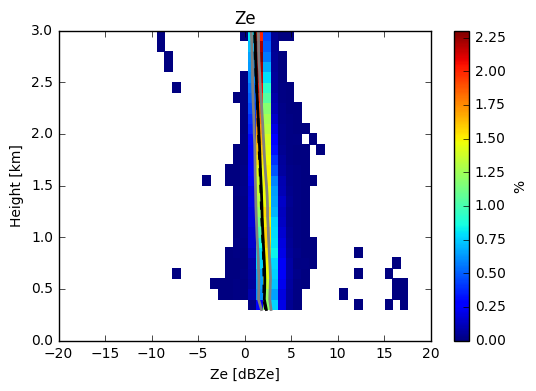

In [6]:
var1 = W #dBZe
var2 = height/1000. #km

densplot(var1,var2,title="Ze",bins = [50,31], 
         Range = [[-20,20],[0,3]],
         xlab = 'Ze [dBZe]',
         ylab= 'Height [km]', 
         cbar_label = '%')
pylab.show()